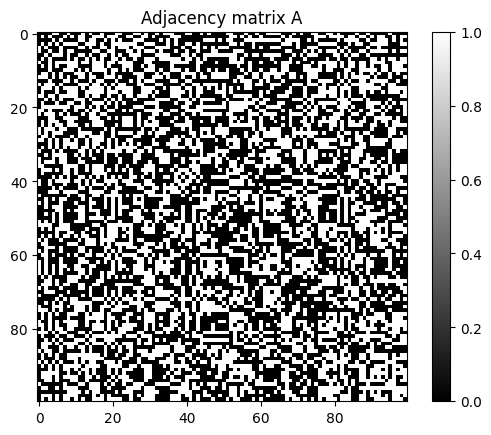

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
script_dir = os.getcwd()
data_path = os.path.join(script_dir, 'A.txt')
# A = np.loadtxt(r"C:\Users\erics\OneDrive\桌面\A.txt", delimiter=",")
A = np.loadtxt(data_path, delimiter=",")
n = A.shape[0]
lam = 5.0
A_hat = lam * np.ones((n, n)) - A


plt.imshow(A, cmap="gray")   
plt.title("Adjacency matrix A")
plt.colorbar()
plt.show()



In [ ]:
def ADMM(A, lam_initial=5, rho=5.0, max_iter=1000, tol=1e-4):
    n = A.shape[0]

    A_e = lam_initial * np.ones((n, n)) - A

    x = np.zeros((n, n))
    z = np.eye(n)
    lamda = np.zeros((n, n))

    for k in range(1, max_iter + 1):

        B = z - (1.0 / rho) * (A_e + lamda)

        B = 0.5 * (B + B.T)             
        eigval, eigvec = np.linalg.eigh(B)
        eigval_clipped = np.clip(eigval, 0.0, None)
        x = (eigvec * eigval_clipped) @ eigvec.T

        C = x + (1.0 / rho) * lamda

        z = C.copy()
        np.fill_diagonal(z, 1.0)

        lamda = lamda + rho * (x - z)

        norm = np.linalg.norm(x - z, 'fro')
        
        if norm < tol:
            print(f"Converged at iter {k}")
            break

    return x, z, lamda



Converged at iter 879
Group 1 nodes: [ 1  3  5  7  8  9 10 13 15 16 17 19 21 23 24 25 29 30 31 36 37 38 40 41
 43 52 53 54 55 57 60 66 67 68 72 76 77 78 79 80 82 84 87 88 90 91 92 93
 94 96 97 98 99]
Group 2 nodes: [ 0  2  4  6 11 12 14 18 20 22 26 27 28 32 33 34 35 39 42 44 45 46 47 48
 49 50 51 56 58 59 61 62 63 64 65 69 70 71 73 74 75 81 83 85 86 89 95]


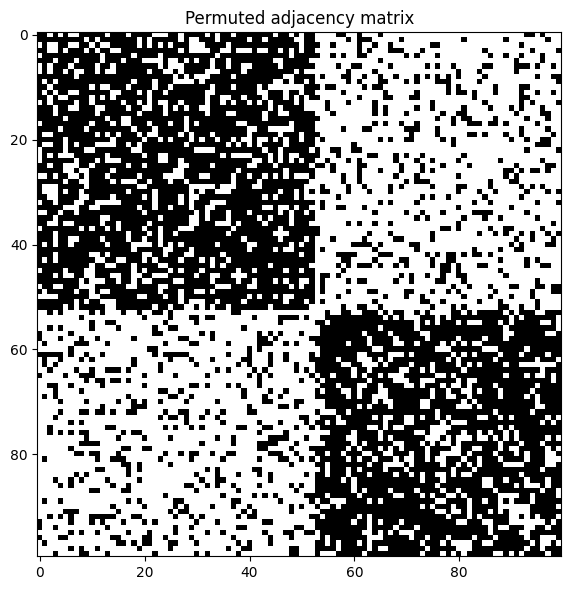

In [35]:
X_opt, Z_opt, Lambda_opt = ADMM(A, lam_initial=lam, rho=2, max_iter=1000, tol=1e-4)
eigval, eigvec = np.linalg.eigh(X_opt)

idx = np.argmax(eigval)
alpha = eigval[idx]
x = eigvec[:, idx]
group1 = np.where(x >= 0)[0]
group2 = np.where(x < 0)[0]

print("Group 1 nodes:", group1)
print("Group 2 nodes:", group2)

perm = np.concatenate([group1, group2])

A_perm = A[np.ix_(perm, perm)]

plt.figure(figsize=(6, 6))
plt.imshow(A_perm, cmap="gray_r", interpolation="nearest")
plt.title("Permuted adjacency matrix")
plt.tight_layout()
plt.show()